# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
import pandas as pd 
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.dropna(subset= ['bill_depth_mm'], inplace=True)

need to dummify island, sex, and species

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

num = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year']
num_transform = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat = ['species', 'island', 'sex']
cat_transform = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])

ct = ColumnTransformer([
    ('num', num_transform, num),
    ("cat", cat_transform, cat)
])

pipeline = Pipeline([
    ("preprocessor", ct),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.7237584638445272


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


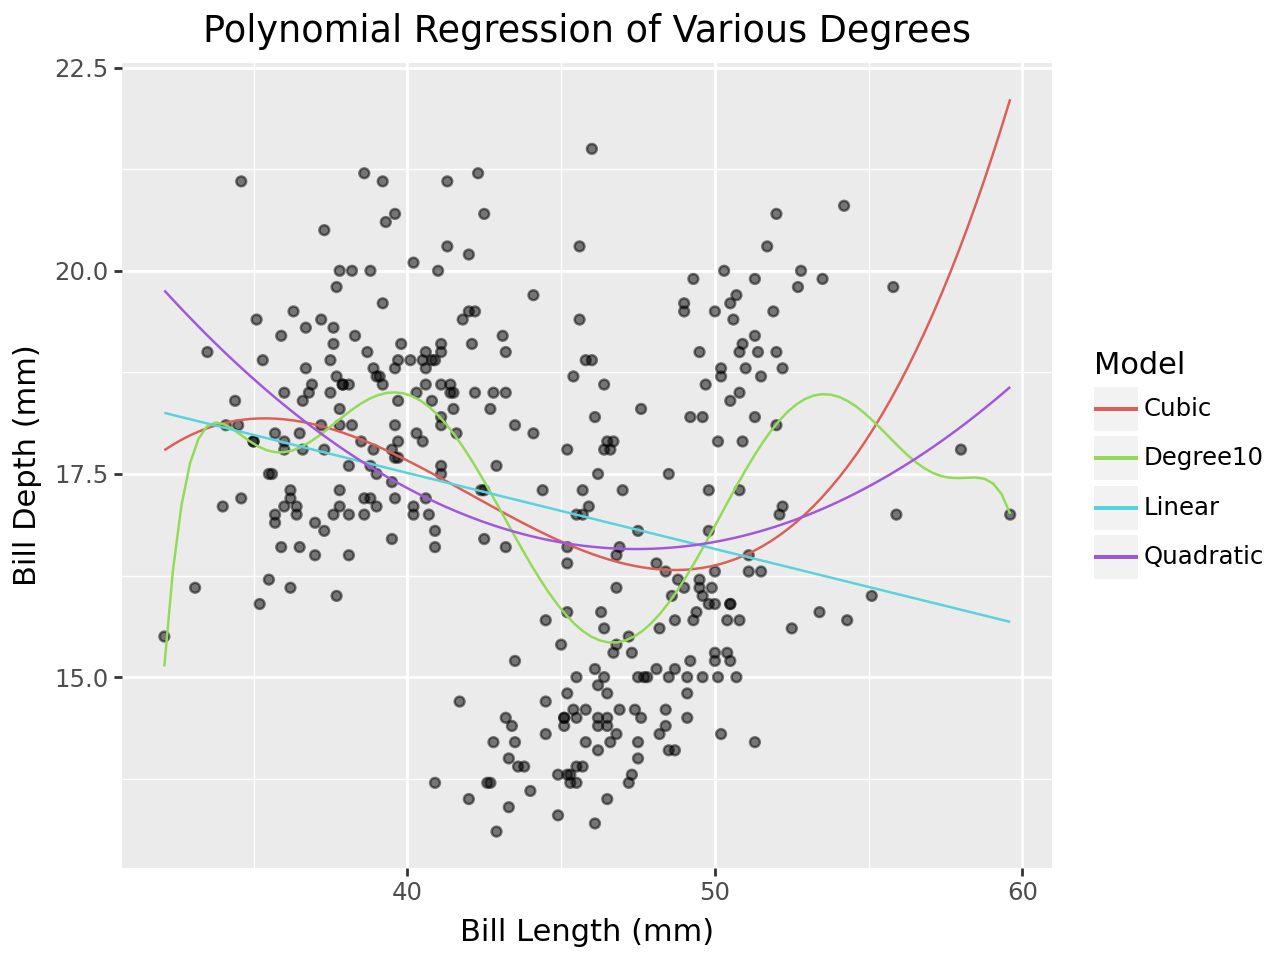

In [8]:
from sklearn.preprocessing import PolynomialFeatures
import plotnine as plt
from plotnine import *
import numpy as np

X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

models = {
    "Linear": Pipeline([
        ("scalar", StandardScaler()),
        ("linear", LinearRegression())
    ]),
    "Quadratic": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("linear", LinearRegression())
    ]),
    "Cubic": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=3)),
        ("linear", LinearRegression())
    ]),
    "Degree10": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=10)),
        ("linear", LinearRegression())
    ])
}

# Generate predictions for each model
x_range = np.linspace(X['bill_length_mm'].min(), X['bill_length_mm'].max(), 100).reshape(-1, 1)
predictions = pd.DataFrame({"bill_length_mm": x_range.flatten()})

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(x_range)

# Convert predictions to long format for plotnine
predictions_long = predictions.melt(id_vars="bill_length_mm", 
                                    var_name="Model", 
                                    value_name="Predicted_bill_depth_mm")

# Original data for scatter plot
data = pd.DataFrame({"bill_length_mm": X['bill_length_mm'], "bill_depth_mm": y})

# Plot with plotnine
(
    ggplot(data, aes(x="bill_length_mm", y="bill_depth_mm")) +
    geom_point(color="black", alpha=0.5) +
    geom_line(predictions_long, aes(x="bill_length_mm", y="Predicted_bill_depth_mm", color="Model")) +
    labs(title="Polynomial Regression of Various Degrees",
         x="Bill Length (mm)",
         y="Bill Depth (mm)") 
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The straight line model and the quadratic were most likely under fitting as they dont follow the points close enough

The degree 10 model is overfitting the data as it follows it too closely

I think the cubic fits the model best since it is most similar to the trends without being too close